# HW 1

In [8]:
!python3.9 -m pip install pandas

You should consider upgrading via the 'C:\Users\USER\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


In [7]:
!python3.9 -m pip install matplotlib

^C


You should consider upgrading via the 'C:\Users\USER\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


In [ ]:
!python3.9 -m pip install scikit-learn

     ---------------------------------------- 11.2/11.2 MB 8.4 MB/s eta 0:00:00
     ---------------------------------------- 46.2/46.2 MB 5.9 MB/s eta 0:00:00


You should consider upgrading via the 'C:\Users\USER\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline

# Загружаем выборку Diamonds

На данной выборке можно проверять работоспособность своего решения

1. PRICE: цена в долларах США (от 326 до 18,823)
2. CARAT: вес алмаза в каратах (от 0.2 до 5.01)
3. CUT: качество огранки (Fair - Удовл., Good - Хор., Very Good - Очень хор., Premium - Премиум, Ideal - Идеальная)
4. COLOR: цвет алмаза, от J (худший) до D (лучший)
5. CLARITY: показатель чистоты алмаза (I1 (худшая), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (лучшая))
6. X: длина в мм (от 0 до 10.74)
7. Y: ширина в мм (от 0 до 58.9)
8. Z: глубина (высота) в мм (от 0 до 31.8)
9. DEPTH: общий процент глубины = z / среднее(x, y) = 2 * z / (x + y) (от 43% до 79%)
10. TABLE: ширина верхней площадки алмаза относительно самой широкой точки (от 43% до 95%)

In [6]:
diamonds_df = pd.read_csv('diamonds.csv')

In [7]:
diamonds_df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


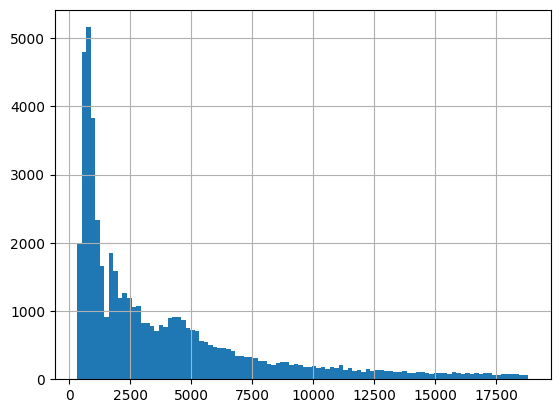

In [8]:
plt.hist(diamonds_df['price'], bins=100)
plt.grid();

# Подготовка данных

In [9]:
features = ['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z']
target = ['price']

In [10]:
cut_transform = {'Fair': 0, 'Good': 1, 'Very Good': 2, 'Premium': 3, 'Ideal': 4}
clarity_transform = {'I1': 0, 'SI2': 1, 'SI1': 2, 'VS2': 3, 'VS1': 4, 'VVS2': 5, 'VVS1': 6, 'IF': 7}
color_transorm = {'D': 0, 'E': 1, 'F': 2, 'G': 3, 'H': 4, 'I': 5, 'J': 6}

In [11]:
diamonds_df['cut'] = diamonds_df['cut'].apply(lambda x: cut_transform.get(x))
diamonds_df['color'] = diamonds_df['color'].apply(lambda x: color_transorm.get(x))
diamonds_df['clarity'] = diamonds_df['clarity'].apply(lambda x: clarity_transform.get(x))

In [36]:
X = diamonds_df[features].copy().values
y = diamonds_df[target].values

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=47, test_size=0.3)

In [39]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Обучаем модель линейной регрессии

In [ ]:
reg = LinearRegression().fit(X_train, y_train)

In [ ]:
y_pred = reg.predict(X_test)

In [ ]:
score = r2_score(y_pred, y_test)

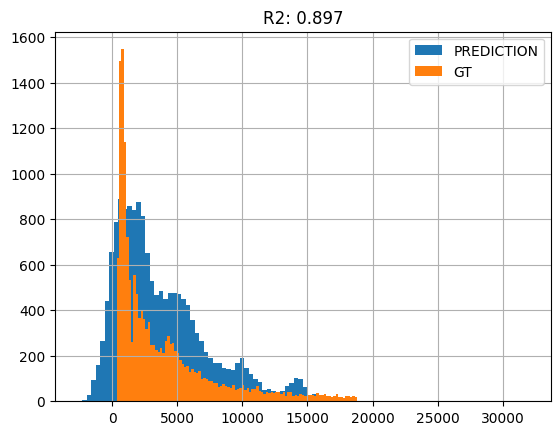

In [ ]:
plt.title(f'R2: {str(score)[:5]}')
plt.hist(y_pred.reshape(1, -1)[0], bins=100, label='PREDICTION')
plt.hist(y_test.reshape(1, -1)[0], bins=100, label='GT')
plt.legend()
plt.grid();

# Задание 1: Реализация Gradient Descent для модели линейной регрессии

Ниже представлен шаблон кода, который необходимо дополнить, реализовав все указанные методы, и самостоятельно протестировать корректность решения. Можно (и даже нужно) добавлять свои методы для бОльшей читабельности кода

Достаточно будет, чтобы код работал для случая, когда X и y - np.ndarray

Внутри класса запрещается использовать сторонние библиотеки, кроме numpy

In [ ]:
class LinearRegressorGD:
    """
    Линейная регрессия с использованием Gradient Descent
    """

    def __init__(self, learning_rate=0.01, n_iter=1000):
        """
        Конструктор класса

        Параметры:
            learning_rate (float): Скорость обучения
            n_iter (int): Количество итераций градиентного спуска
        """
        self.learning_rate = learning_rate
        self.n_iter = n_iter
        self.EPS = 0.000005
        self.weight = None
        self.bias = None

    def fit_long(self, X, y):
        """
        Обучение модели на обучающей выборке с использованием
        градиентного спуска

        Параметры:
            X (np.ndarray): Матрица признаков размера (n_samples, n_features)
            y (np.ndarray): Вектор таргета длины n_samples
        """
        n_samples, n_features = X.shape
        self.weight = np.zeros(n_features)
        self.bias = 0
            
        for _ in range(self.n_iter):
            dQ_w_sum, dQ_bias_sum = np.zeros(n_features), 0
            for i in range(n_samples):
                y_pred_i = np.dot(X[i], self.weight) + self.bias
                dQ_w_sum += (y_pred_i - y[i]) * X[i]
                dQ_bias_sum += (y_pred_i - y[i])
            dQ_w = dQ_w_sum * 2/n_samples
            dQ_bias = dQ_bias_sum * 2/n_samples

            gradient_norm = np.linalg.norm(dQ_w) + abs(dQ_bias)
            if gradient_norm < self.EPS:
                break
            self.weight -= self.learning_rate * dQ_w
            self.bias -= self.learning_rate * dQ_bias
            
    def fit(self, X, y):
        """
        Обучение модели на обучающей выборке с использованием
        градиентного спуска

        Параметры:
            X (np.ndarray): Матрица признаков размера (n_samples, n_features)
            y (np.ndarray): Вектор таргета длины n_samples
        """
        n_samples, n_features = X.shape
        self.weight = np.zeros(n_features)
        self.bias = 0
            
        for _ in range(self.n_iter):
            y_pred = np.dot(X, self.weight) + self.bias
            error = y_pred - y.flatten()
            
            dQ_w = np.dot(X.T, error) * 2/n_samples
            dQ_bias = np.sum(error) * 2/n_samples

            gradient_norm = np.linalg.norm(dQ_w) + abs(dQ_bias)
            if gradient_norm < self.EPS:
                break

            self.weight -= self.learning_rate * dQ_w
            self.bias -= self.learning_rate * dQ_bias
        
    def predict(self, X):
        """
        Получение предсказаний обученной модели

        Параметры:
            X (np.ndarray): Матрица признаков

        Возвращает:
            np.ndarray: Предсказание для каждого элемента из X
        """
        return np.dot(X, self.weight) + self.bias

    def get_params(self):
        """
        Возвращает обученные параметры модели
        """
        return self.weight, self.bias


In [ ]:
reg = LinearRegressorGD(learning_rate=0.005, n_iter=50000)
reg.fit(X_train, y_train)

In [ ]:
y_pred = reg.predict(X_test)

In [ ]:
score = r2_score(y_test, y_pred)

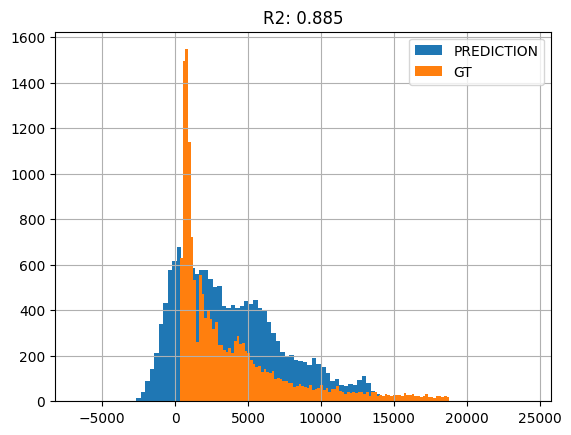

In [ ]:
plt.title(f'R2: {str(score)[:5]}')
plt.hist(y_pred.reshape(1, -1)[0], bins=100, label='PREDICTION')
plt.hist(y_test.reshape(1, -1)[0], bins=100, label='GT')
plt.legend()
plt.grid();

# Задание 2: Реализация backpropagation для MLP

Ниже представлен шаблон кода, который необходимо дополнить, реализовав все указанные методы, и самостоятельно протестировать корректность решения. Можно (и даже нужно) добавлять свои методы для бОльшей читабельности кода

Достаточно будет, чтобы код работал для случая, когда X и y - np.ndarray

В качестве функции активации нужно использовать sigmoid

Внутри класса запрещается использовать сторонние библиотеки, кроме numpy

In [2]:
import numpy as np

In [ ]:
class MLPRegressor:
    """
    Многослойный перцептрон (MLP) для задачи регрессии, использующий алгоритм
    обратного распространения ошибки
    """

    def __init__(self, hidden_layer_sizes=(100,), learning_rate=0.01, n_iter=100):
        """
        Конструктор класса

        Параметры:
            hidden_layer_sizes (tuple): Кортеж, определяющий архитектуру
        скрытых слоев. Например (100, 10) - два скрытых слоя, размером 100 и 10
        нейронов, соответственно
            learning_rate (float): Скорость обучения
            n_iter (int): Количество итераций градиентного спуска
        """
        self.hidden_layer_sizes = hidden_layer_sizes
        self.learning_rate = learning_rate
        self.n_iter = n_iter
        self.EPS = 1e-5

        self.layer_sizes = None
        self.weight = None
        self.bias = None
        self.activ = None

    # сигмоидальная функция активации
    def _activation_function(self, x):
        x = np.clip(x, -500, 500)  # ограничение диапазона
        return 1 / (1 + np.exp(-x))
    
    def _initialize_params(self, n_features, count_outputs):
        """
        Инициализация весов и смещений сети для всех слоёв

        Параметры:
            n_features (int): Количество признаков в данных
            count_outputs (int): Количество выходов модели (для регрессии 1)
        """
        
        self.layer_sizes = [n_features] + list(self.hidden_layer_sizes) + [count_outputs]

        self.weight = list()
        self.bias = list()
        self.activ = list()

        # инициализируются веса и смещения
        for i in range(len(self.layer_sizes) - 1):
            weight_matrix = np.random.randn(self.layer_sizes[i+1], self.layer_sizes[i]) * 0.01
            bias_vector = np.zeros((self.layer_sizes[i+1], 1))
            self.weight.append(weight_matrix)
            self.bias.append(bias_vector)

        # формирование "пустых" активаций
        for size in self.layer_sizes:
            self.activ.append(np.zeros((size, 1)))


    def _update_params(self):
        """
        Обновление параметров модели градиентным спуском
        """
        for i in range(len(self.weight)):
            self.weight[i] -= self.learning_rate * self.dL_dW[i]
            self.bias[i] -= self.learning_rate * self.dL_db[i]

    
    def _calc_MSE(self, y):
        """
        Вычисление средней квадратичной ошибки (MSE)

        Параметры:
            y (np.ndarray): Вектор таргета длины n_samples

        Возвращает:
            float: Значение MSE
        """
        mse = np.mean((self.activ[-1].T - y) ** 2)
        return mse

    def _calc_gradients(self, y):
        """
        Вычисление градиентов весов и смещений для каждого слоя

        Параметры:
            y (np.ndarray): Вектор таргета длины n_samples
        """
        m = y.shape[0]
        y = y.T

        # градиент для выхода (тк регрессия без сигмоиды)
        dZ = 2 * (self.activ[-1] - y)

        self.dL_dW = list()
        self.dL_db = list()

        for i in reversed(range(len(self.layer_sizes) - 1)):
            dW = (dZ @ self.activ[i].T) / m
            db = np.sum(dZ, axis=1, keepdims=True) / m

            self.dL_dW.insert(0, dW)
            self.dL_db.insert(0, db)

            # для скрытых слоёв применяется сигмоида
            if i > 0:
                dZ = (self.weight[i].T @ dZ) * self.activ[i] * (1 - self.activ[i])
        

    def forward(self, X):
        """
        Реализация forward pass

        Параметры:
            X (np.ndarray): Матрица признаков размера (n_samples, n_features)

        Возвращает:
            np.ndarray: Предсказания модели
        """
        self.activ[0] = X.T

        for i in range(1, len(self.layer_sizes)):
            xi = self.weight[i-1] @ self.activ[i-1] + self.bias[i-1]
            if i == (len(self.layer_sizes) - 1):  # последний слой - линейный
                self.activ[i] = xi
            else:
                self.activ[i] = self._activation_function(xi)

        return self.activ[-1].T

    def backward(self, X, y):
        """
        Реализация backward pass (обратное распространение ошибки)

        Возвращает:
            X (np.ndarray): Матрица признаков размера (n_samples, n_features)
            y (np.ndarray): Вектор таргета длины n_samples
        """
        self._calc_gradients(y)
        self._update_params()        
        return X, y

    def fit(self, X, y):
        """
        Обучение модели

        Параметры:
            X (np.ndarray): Матрица признаков размера (n_samples, n_features)
            y (np.ndarray): Вектор таргета длины n_samples
        """
        n_samples, n_features = X.shape
        if y.ndim == 1:
            y = y.reshape(-1, 1)
        count_outputs = y.shape[1]

        self._initialize_params(n_features, count_outputs)

        for _ in range(self.n_iter):
            self.forward(X)

            mse = self._calc_MSE(y)
            if mse < self.EPS:
                break

            self.backward(X, y)

    def predict(self, X):
        """
        Получение предсказаний обученной модели

        Параметры:
            X (np.ndarray): Матрица признаков

        Возвращает:
            np.ndarray: Предсказание для каждого элемента из X
        """
        return self.forward(X)


In [22]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

In [ ]:
# генерируются синтетические данные
X, y = make_regression(n_samples=2000, n_features=10, noise=15, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
reg = MLPRegressor(hidden_layer_sizes=(100, 100), learning_rate=0.01, n_iter=1000)
reg.fit(X_train, y_train)

In [39]:
y_pred = reg.predict(X_test)

In [40]:
score = r2_score(y_test, y_pred)

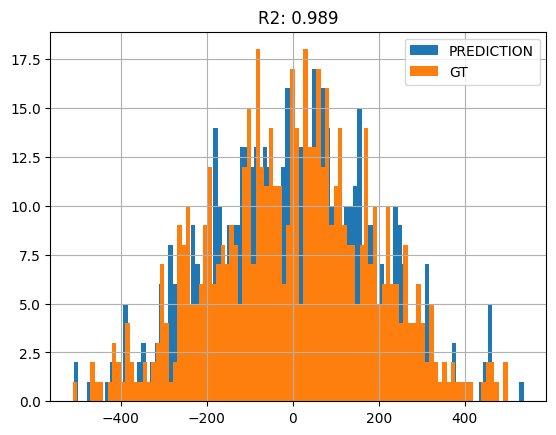

In [41]:
plt.title(f'R2: {str(score)[:5]}')
plt.hist(y_pred.reshape(1, -1)[0], bins=100, label='PREDICTION')
plt.hist(y_test.reshape(1, -1)[0], bins=100, label='GT')
plt.legend()
plt.grid();